In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('../data/clickbait_data.csv')
df

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB


In [3]:
df.isnull().sum()

headline     0
clickbait    0
dtype: int64

## Data Preprocessing & Preparation

<AxesSubplot:xlabel='clickbait', ylabel='count'>

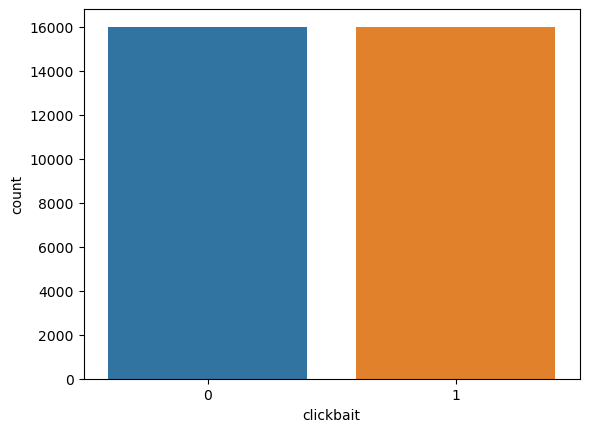

In [4]:
import seaborn as sns
sns.countplot(x=df.clickbait)

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

def RemoveSpecialCharacters(sentence):
    return re.sub('[^a-zA-Z]+',' ',sentence)

def ConvertToLowerCase(sentence):
    return sentence.lower()

def ConvertAndRemove(sentence):
    sentence = str(sentence)
    sentence = RemoveSpecialCharacters(sentence)
    # convert to lower case
    sentence = ConvertToLowerCase(sentence)
    return sentence

def CleanText(sentence):
    sentence = str(sentence)

    # Remove stopwords
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Remove punctuation
    nopunc = [char for char in sentence if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    sentence = ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])
    sentence = ConvertAndRemove(sentence)
    return sentence

In [7]:
df['Text_cleaning'] = df.headline.apply(CleanText)
df.head()

,headline,clickbait,Text_cleaning
0,Should I Get Bings,1,get bings
1,Which TV Female Friend Group Do You Belong In,1,tv female friend group belong
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,new star wars force awakens trailer give chills
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,vine new york celebrity big brother fucking pe...
4,A Couple Did A Stunning Photo Shoot With Their...,1,couple stunning photo shoot baby learning inop...


In [8]:
X = df.Text_cleaning
y = df.clickbait

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print('Total rows in dataset:',len(X))
print('The length of X_train is:',len(X_train))
print('The length of X_test is:',len(X_test))

Total rows in dataset: 32000
The length of X_train is: 25600
The length of X_test is: 6400


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_clean = tfidf_transformer.fit_transform(X_train_dtm)

In [13]:
print(X_train_clean)

  (0, 20691)	0.27874184201961916
  (0, 17768)	0.3345529176182634
  (0, 15408)	0.443280710732536
  (0, 15002)	0.37952311039285885
  (0, 13192)	0.443280710732536
  (0, 12018)	0.32318125012329857
  (0, 5712)	0.30945596770049805
  (0, 3477)	0.2704345505044664
  (1, 19768)	0.4943954061330551
  (1, 19352)	0.6624730736498667
  (1, 8360)	0.5627633686403459
  (2, 19358)	0.398093544057493
  (2, 14980)	0.3044588790043617
  (2, 14484)	0.25078631831387677
  (2, 13284)	0.33813632294469903
  (2, 12879)	0.18494510864592098
  (2, 12716)	0.45227553340304516
  (2, 9559)	0.2966918040963563
  (2, 7673)	0.398093544057493
  (2, 7100)	0.2938265186498573
  (3, 12037)	0.31565021664326437
  (3, 10624)	0.41919574997204595
  (3, 10118)	0.402951847353606
  (3, 8075)	0.2854420765479582
  (3, 7531)	0.3409694430081179
  :	:
  (25596, 11813)	0.5860933147732315
  (25596, 9071)	0.3572209408805257
  (25596, 7075)	0.29993546844497326
  (25596, 6255)	0.43653766312518216
  (25597, 15954)	0.36744333021546094
  (25597, 15204)	

## Model Training

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [15]:
Classifiers = [
{
   'label': 'Logistic Regression',
   'model': LogisticRegression(C=0.00000001,solver='liblinear',max_iter=200, multi_class='auto'),
},
{
    'label': 'SGD Classifier',
    'model': SGDClassifier(loss='log', warm_start=True, max_iter=1000, l1_ratio=0.03, penalty='l2', alpha=1e-4, fit_intercept=False),
},
{
    'label': 'KNeighbours',
    'model': KNeighborsClassifier(n_neighbors=15),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(max_depth=10,random_state=101,max_features= None,min_samples_leaf=15),
},
{
   'label': 'Random Forest',
   'model': RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1,random_state=101,max_features= None,min_samples_leaf = 30),
}
]

In [16]:
Accuracy=[]
Model=[]
prediction = []
for c in Classifiers:
    classifier = c['model']
    fit = classifier.fit(X_train_clean, y_train)
    pred = fit.predict(X_test_dtm)
    prediction.append(pred)
    accuracy = accuracy_score(pred,y_test)
    Accuracy.append(accuracy)
    Model.append(c['label'])
    print('Accuracy of '+c['label']+' is '+str(accuracy))

Accuracy of Logistic Regression is 0.68390625
Accuracy of SGD Classifier is 0.9421875
Accuracy of KNeighbours is 0.8678125
Accuracy of Decision Tree is 0.6415625
Accuracy of Random Forest is 0.8153125


## Model Evaluation & Performance Metrics

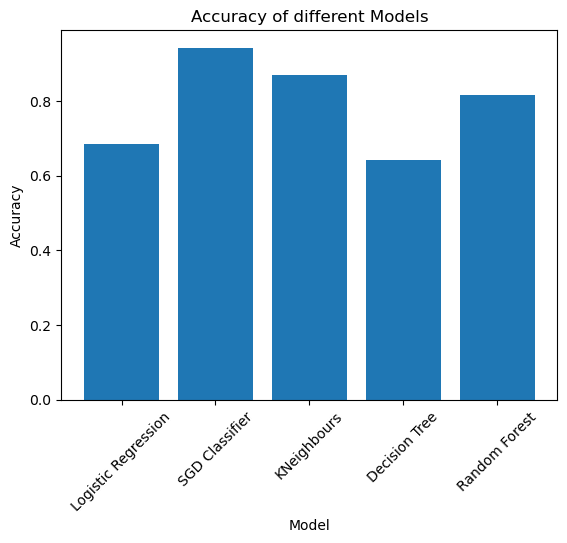

In [21]:
import matplotlib.pyplot as plt
Index = np.arange(5)
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracy of different Models')
plt.show()

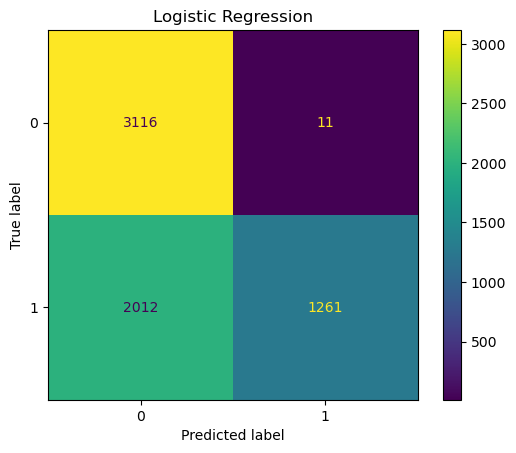

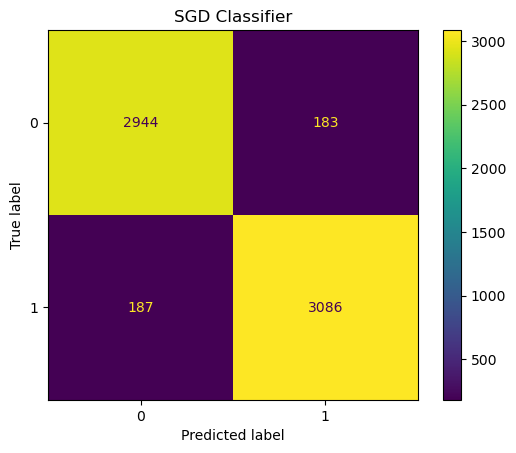

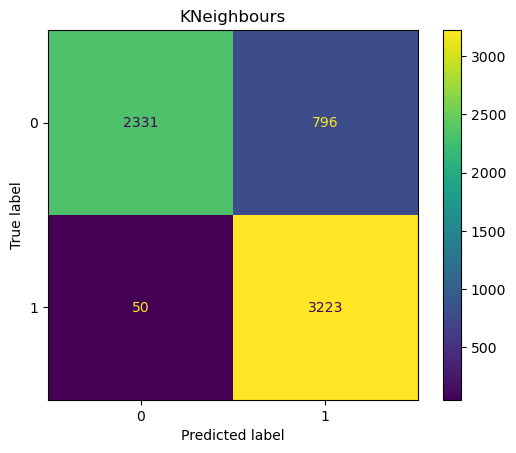

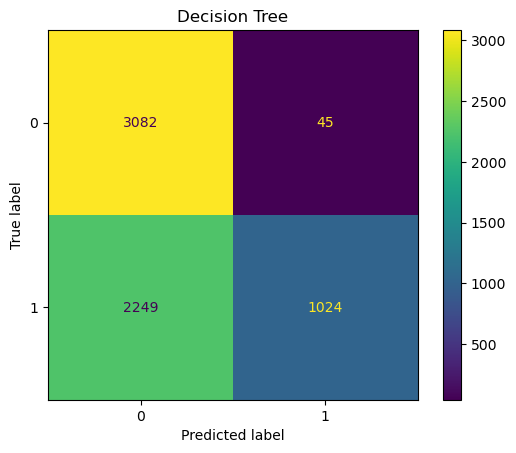

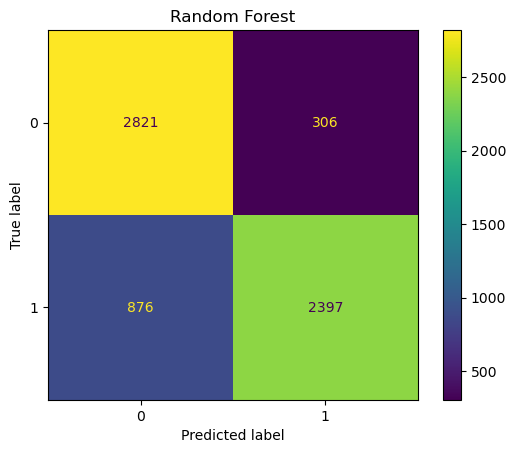

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

for i,p in enumerate(prediction):
    cm = confusion_matrix(y_test, p, labels=fit.classes_)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(values_format='g')
    disp.ax_.set_title(Classifiers[i]['label'])

plt.show()

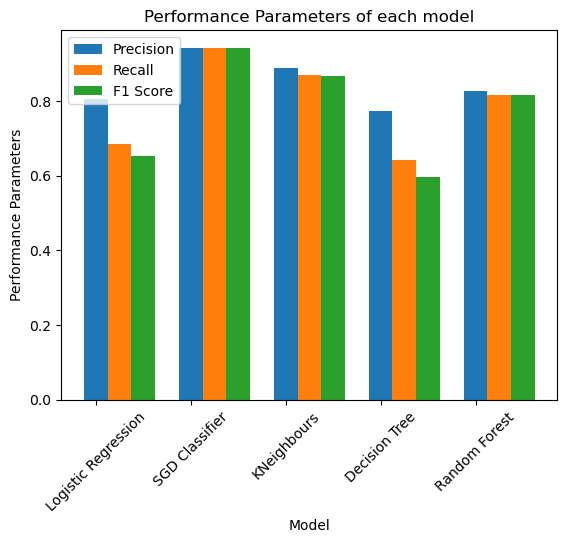

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision=[]
recall=[]
f1_scores=[]
for i,p in enumerate(prediction):
    precision.append(precision_score(y_test, p, average='weighted'))
    recall.append(recall_score(y_test, p, average='weighted'))
    f1_scores.append(f1_score(y_test, p, average='weighted'))


plt.bar(Index, precision, 0.25, label = 'Precision')
plt.bar(Index+0.25, recall, 0.25, label = 'Recall')
plt.bar(Index+0.5, f1_scores, 0.25, label = 'F1 Score')
plt.xticks(Index, Model,rotation=45)
plt.xlabel("Model")
plt.ylabel("Performance Parameters")
plt.title("Performance Parameters of each model")
plt.legend()
plt.show()

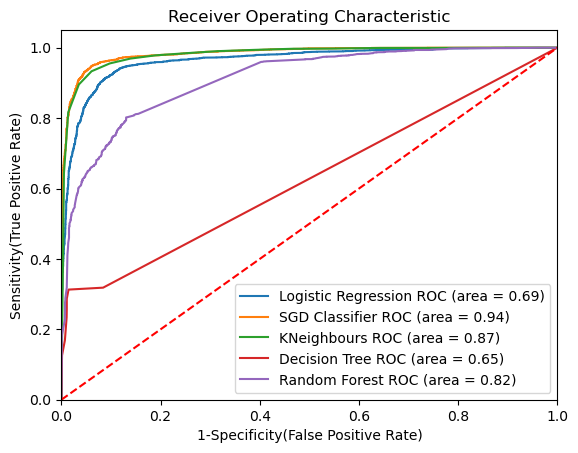

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Below for loop iterates through your models list
for m in Classifiers:
    model = m['model'] # select the model
    model.fit(X_train_clean, y_train) # train the model
    y_pred=model.predict(X_test_dtm) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_dtm)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_dtm))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display